<a href="https://colab.research.google.com/github/janabassemv/Customer-Segmentation/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Nada Ahmed

ID:58-9887

Tutorial:11

---

Name: Jana Bassem

ID:58-19575

Tutorial:11

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head(20)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh
5,BLD-1005-VX,Commercial,NaN,%9New Cairo,SunDay,Low,Medium,37377m2,2022-07-31,37.54,4687.67 kWh
6,BLD-1006-RC,Industrial,Cairo,Heliopolis_59,saturDAY,High,Low,38638m2,2023-07-07,50.00,5526.83 kWh
7,BLD-1007-SN,Residential,Cairo,New Cairo,tuesDAY,Medium,Low,34950m2,2020-07-29,38.51,4116.32 kWh
8,BLD-1008-BA,Industrial,Alexandria,Gleem(23,MoNday,High,High,29741m2,2024-12-31,43.62,5841.65 kWh
9,BLD-1009-CG,Residential,NaN,=Mohandessin10,FRIDAY,Medium,High,17467,2023-01-14,33.18,3419.13 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()                  #Displays dataset structure including column names, data types, and count of non null values
df.isnull().sum()          #Shows the number of missing values in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


,0
Building_ID,0
Building_Type,110
Governorate,227
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,110


In [ ]:
df.describe()  #shows summary statistics like count , mean , std and more for numerical columns

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
df=df.drop('Building_ID', axis=1)
df['Neighborhood'] = df['Neighborhood'].str.replace(r'[^a-zA-Z \s]','', regex=True)                         #removes anything that is not a letter or a space

df['Day_of_Week']= df['Day_of_Week'].str.lower().str.capitalize()                                           #Turns all letters to lower case then capitalizes the first letter

df['SquareFootage']= df['SquareFootage']. str.replace('m2', '', regex=True)                                 #removes the m2 that is in some of the SquareFootage values
df['SquareFootage']= df['SquareFootage']. str.replace(r'[^0-9\s]', '', regex=True)                          #removes anything that is not a number or a space
df['Energy_Consumption']= df['Energy_Consumption']. str.replace(r'[^0-9\s]', '', regex=True)                #removes anything that is not a number or a space

df.loc[(df['Neighborhood'] == "New Cairo")| (df['Neighborhood'] == "Heliopolis")| (df['Neighborhood'] == "Maadi") & (df['Governorate'].isna()), 'Governorate'] = "Cairo"    #Fills in all NaN in Government with Cairo for Neighborhood New Cairo and Helioplis
df.loc[(df['Neighborhood'] == "Dokki") | (df['Neighborhood'] == "Mohandessin") & (df['Governorate'].isna()), 'Governorate'] = "Giza"       #Fills in all NaN in Government with Giza for Neighborhood Dokki and Mohandessin
df.loc[(df['Neighborhood'] == "Smouha") | (df['Neighborhood'] == "Gleem") & (df['Governorate'].isna()), 'Governorate'] = "Alexandria"      #Fills in all NaN in Government with Alexandria for Neighborhood Gleem and Smouha

df['SquareFootage']= df['SquareFootage']. str.replace(r'[^0-9\s]', '', regex=True)



df['Building_Type'] = df['Building_Type'].fillna(df['Building_Type'].mode()[0])                                               #Fills in all NaN in Building_Type with the most repeated type
df['Average_Temperature'] = df['Average_Temperature'].fillna(round(df['Average_Temperature'].mean(), 2)).round(2)             #Fills in all NaN in Average_Temperature with the mode


df.iloc[630:660]



,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
630,Residential,Giza,Mohandessin,Saturday,Medium,High,38500,2021-08-23,31.04,469847
631,Commercial,Cairo,Maadi,Sunday,Medium,High,19756,2022-07-10,43.51,437089
632,Residential,Cairo,Maadi,Tuesday,Medium,High,31159,2020-09-06,34.92,420874
633,Commercial,Cairo,Heliopolis,Thursday,Medium,High,17675,2022-04-16,32.64,403668
634,Commercial,Cairo,New Cairo,Wednesday,Low,Medium,20123,2020-01-01,26.32,344155
635,Residential,Giza,Mohandessin,Sunday,High,Medium,25361,2020-01-28,26.50,393759
636,Residential,Alexandria,Gleem,Saturday,High,High,49256,2023-03-13,46.27,532929
637,Residential,Alexandria,Gleem,Saturday,High,Medium,35339,2023-03-28,37.73,449499
638,Commercial,Alexandria,Smouha,Saturday,High,Medium,12153,2024-02-08,26.88,373352
639,Industrial,Cairo,New Cairo,Tuesday,High,High,39698,2021-12-29,40.98,601494


## Exploratory Data Analysis

In [ ]:
#Feature Engineering:

df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')                           #Convert to datetime
df['Days_since_last_maintenance'] = (pd.Timestamp('today') - df['Last_Maintenance_Date']).dt.days                    #Calculate days since last maintenance
df['Days_since_last_maintenance'] = df['Days_since_last_maintenance'].fillna(df['Days_since_last_maintenance'].median()).astype(int)      #Handle missing values

df['Day_type'] = np.where(df['Day_of_Week'].isin(['Friday', 'Saturday']), 'Weekend', 'Weekday')                      #Create Day_type column where 'Weekend'is  for Friday and Saturday, 'Weekday' otherwise
df['Day_type'] = df['Day_type'].astype('category')                                                                   #Convert to categorical type
df[['Days_since_last_maintenance', 'Day_of_Week', 'Day_type']].head(20)                                              #To check the results nof both feature engineering questions


df.iloc[630:660]

,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Day_type
630,Residential,Giza,Mohandessin,Saturday,Medium,High,38500,2021-08-23,31.04,469847,1520,Weekend
631,Commercial,Cairo,Maadi,Sunday,Medium,High,19756,2022-07-10,43.51,437089,1199,Weekday
632,Residential,Cairo,Maadi,Tuesday,Medium,High,31159,2020-09-06,34.92,420874,1871,Weekday
633,Commercial,Cairo,Heliopolis,Thursday,Medium,High,17675,2022-04-16,32.64,403668,1284,Weekday
634,Commercial,Cairo,New Cairo,Wednesday,Low,Medium,20123,2020-01-01,26.32,344155,2120,Weekday
635,Residential,Giza,Mohandessin,Sunday,High,Medium,25361,2020-01-28,26.50,393759,2093,Weekday
636,Residential,Alexandria,Gleem,Saturday,High,High,49256,2023-03-13,46.27,532929,953,Weekend
637,Residential,Alexandria,Gleem,Saturday,High,Medium,35339,2023-03-28,37.73,449499,938,Weekend
638,Commercial,Alexandria,Smouha,Saturday,High,Medium,12153,2024-02-08,26.88,373352,621,Weekend
639,Industrial,Cairo,New Cairo,Tuesday,High,High,39698,2021-12-29,40.98,601494,1392,Weekday


**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

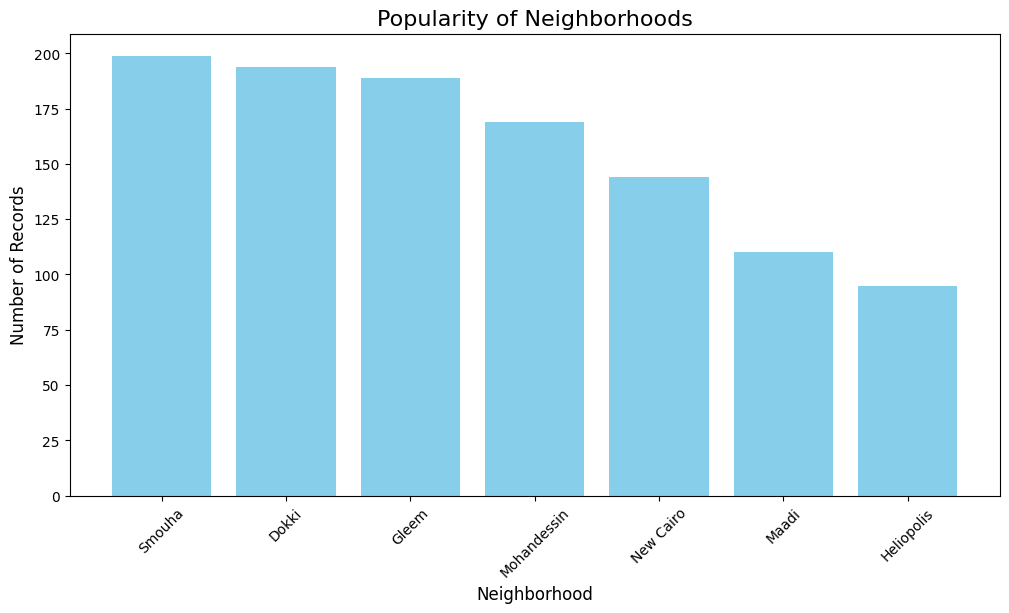

In [ ]:
neighborhood_counts = df['Neighborhood'].value_counts() #count how many times a neighborhood appears
plt.figure(figsize=(12,6)) #the figure size
plt.bar(neighborhood_counts.index, neighborhood_counts.values, color='skyblue')#bar chart plotting
plt.title('Popularity of Neighborhoods', fontsize=16)# writing the title of the chart
plt.xlabel('Neighborhood', fontsize=12) # name of the x label
plt.ylabel('Number of Records', fontsize=12) #name of y label
plt.xticks(rotation=45) # Rotate x-axis labels so they are not messy and can be read
plt.show()#to show the plot results


**Answer for Q1:** The top 3 neighborhoods are Smouha , dokki and Gleem and they are followed by Mohandessin , New Cairo , Maadi and Heliopolis

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

Minimum: 1787
Maximum: 649348


<Figure size 1200x600 with 0 Axes>

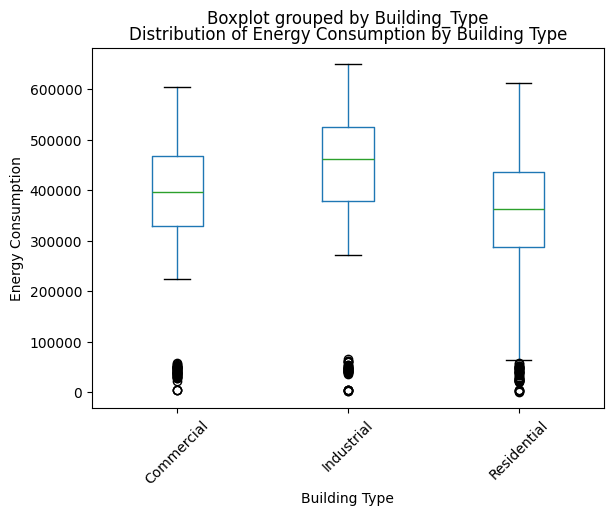

In [ ]:
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
plt.figure(figsize=(12,6)) #set  figure size
df.boxplot(column='Energy_Consumption', by='Building_Type', grid=False)
plt.title('Distribution of Energy Consumption by Building Type')
plt.xlabel('Building Type')# name of the x label
plt.ylabel('Energy Consumption')# name of the x label
plt.xticks(rotation=45)# Rotate x-axis labels so they are not messy and can be read
df[['Building_Type','Energy_Consumption']].head(50)
min_value = df['Energy_Consumption'].min()
max_value = df['Energy_Consumption'].max()

print("Minimum:", min_value)
print("Maximum:", max_value)
plt.show()


**Answer for Q2:** Residential has the widest distribution of energy consumption (with minimum value of 1787 and the maximum value of around 600000)and Industrial has the highest distribution of energy consumption  (with minimum value greater than 250000 and the maximum value of 649348) .  

**Q3:** How does the building size affect energy consumption?

**Visualization**

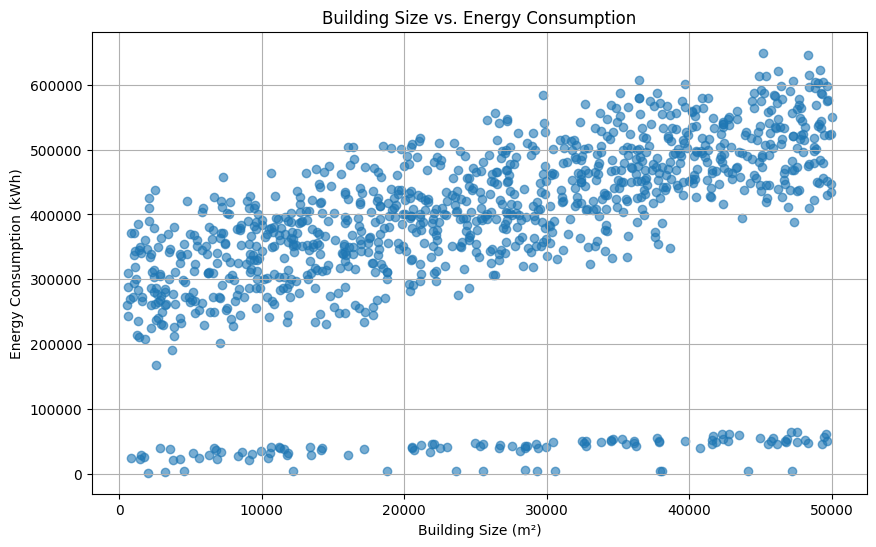

In [ ]:
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(df['SquareFootage'], df['Energy_Consumption'], alpha=0.6)
plt.title('Building Size vs. Energy Consumption')
plt.xlabel('Building Size (m²)')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()


**Answer for Q3:** There is a positive correlation between the Building size and the energy consumption . As the building size increases , the energy consumption increases .

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

Evaluate the model you applied.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.